In [1]:
import numpy as np
import sympy as sym
import pandas as pd
import tadasets
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
import datetime
import os
os.chdir('..')
# sys.path.insert(0,r'/Users/seanippolito/repos/theseankid/computational-topology/distances')
from distances import ellipsoid_distances, standard_distances

In [2]:
x = sym.Symbol('x')
y = sym.Symbol('y')
f = x**2 + y**2 - 1
variables = [x,y]

In [3]:
from ripser import ripser
from persim import plot_diagrams
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

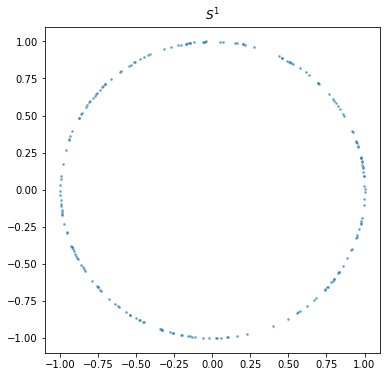

In [4]:
fig, ax = plt.subplots(figsize=(6,6))
seed=5
np.random.seed(seed)
data=tadasets.dsphere(n=200, d=1)
sigma = 0.2

plt.scatter(x=data[:,0], y=data[:,1], s=3, alpha=0.5)
plt.title('$S^1$')
fig.savefig('images/circle_200pts.png')
plt.show()

In [5]:
times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = standard_distances.euclidean_distance_matrix(data, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(data, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(data, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = standard_distances.neighbors_distances(data)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

0:00:00.076373
0:00:00.394191
0:00:00.386653
0:00:00.017189


## Diagrams for points sampled Exactly on a Circle

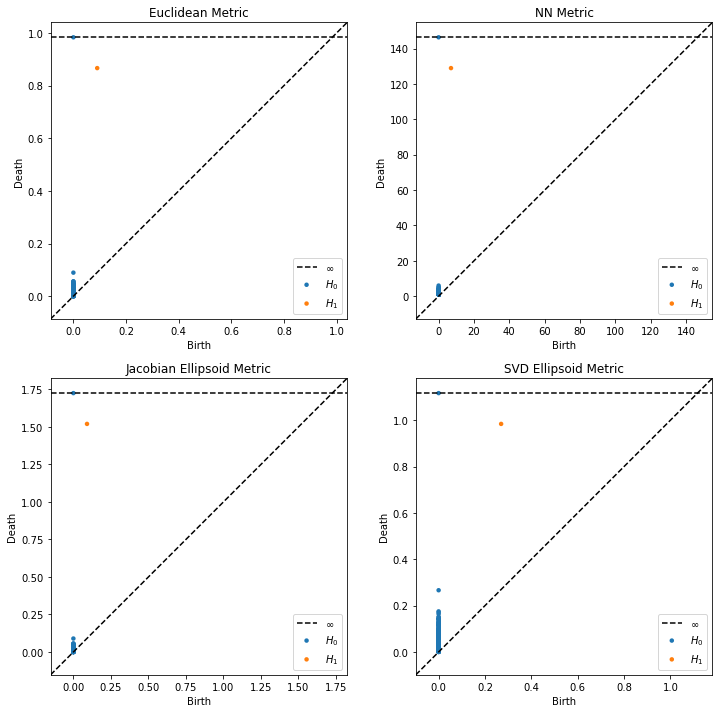

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')

fig.savefig('images/diagrams_circle_200pts.png')

## Diagrams for points sampled on a Circle with noise $= 0.2$

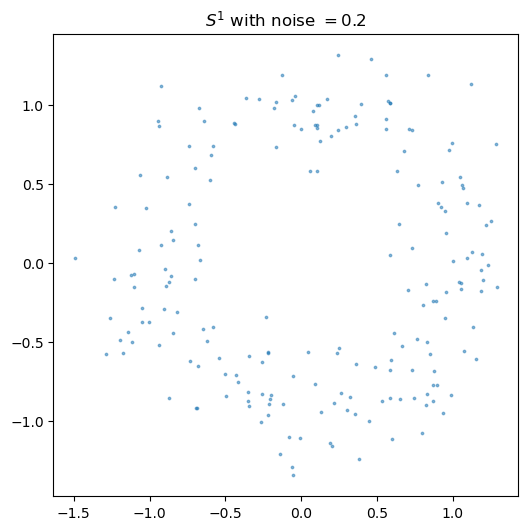

In [7]:
seed=5
fig, ax = plt.subplots(figsize=(6,6))
data=tadasets.dsphere(n=200, d=1, noise = 0.2)
sigma = 0.2
plt.scatter(x=data[:,0], y=data[:,1], s=3, alpha=0.5)
plt.title('$S^1$ with noise $=0.2$')
fig.savefig('images/circle_200pts_noise.png')
plt.show()

In [8]:

times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = ellipsoid_distances.euclidean_distance_matrix(data, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(data, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(data, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = ellipsoid_distances.neighbors_distances(data)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

0:00:00.092537
0:00:00.454536
0:00:00.386175
0:00:00.015384


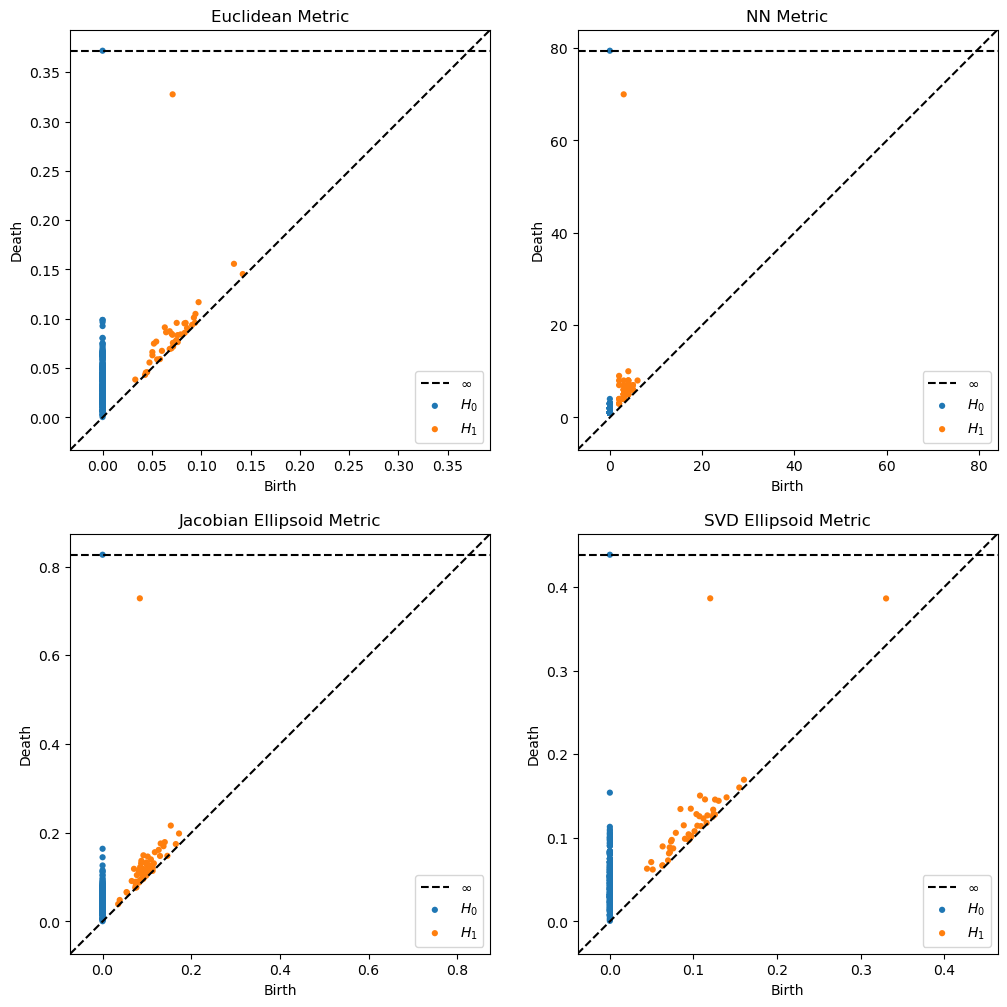

In [9]:
fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True, maxdim=1)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')

fig.savefig('images/diagrams_circle_200pts_noise.png')

## Diagrams for points of a figure 8

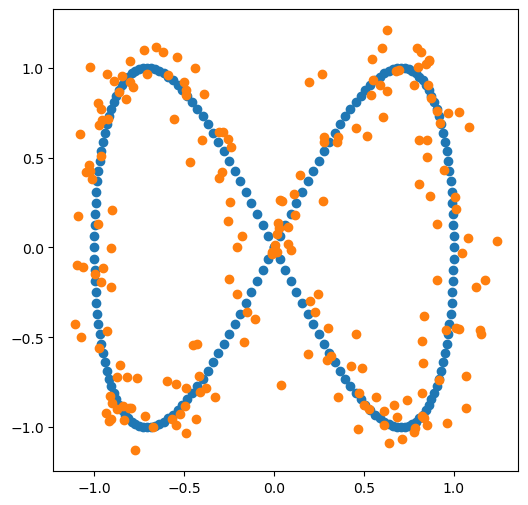

In [10]:
np.random.seed(5)
fig, ax = plt.subplots(figsize=(6,6))
infty = tadasets.infty_sign(n=200)
plt.scatter(infty[:,0], infty[:,1])
# dgms_infty = ripser(infty)['dgms']
# plot_diagrams(dgms_infty, ax=plt.subplot(121), title='500 pts')

infty = tadasets.infty_sign(n=200, noise = .1)
plt.scatter(infty[:,0], infty[:,1])
# dgms_infty = ripser(infty)['dgms']
# plot_diagrams(dgms_infty, ax=plt.subplot(122), title='500 pts')

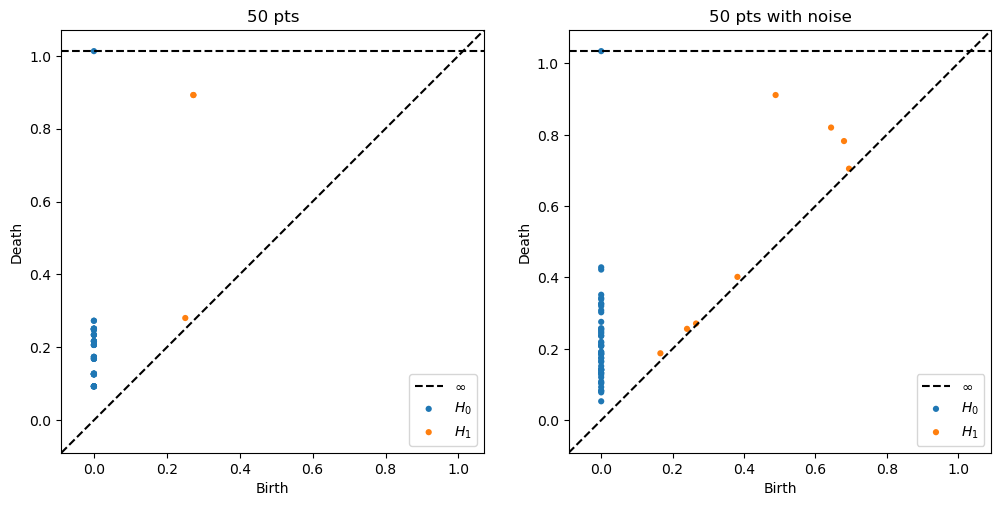

In [11]:
np.random.seed(5)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))
infty = tadasets.infty_sign(n=50)
# ax[0] = plt.scatter(infty[:,0], infty[:,1])
dgms_infty = ripser(infty)['dgms']
plot_diagrams(dgms_infty, ax=plt.subplot(121), title='50 pts')

infty = tadasets.infty_sign(n=50, noise = .1)
# ax[1] = plt.scatter(infty[:,0], infty[:,1])
dgms_infty = ripser(infty)['dgms']
plot_diagrams(dgms_infty, ax=plt.subplot(122), title='50 pts with noise')

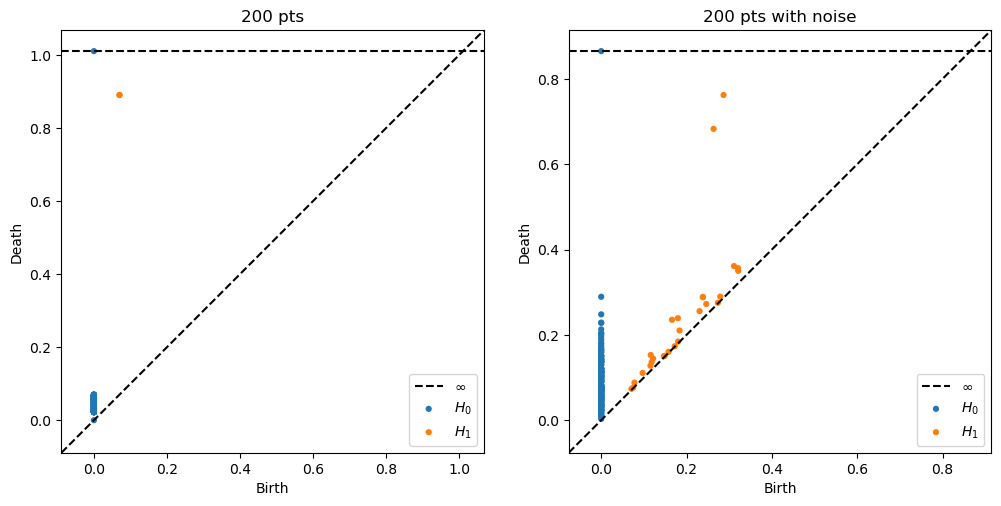

In [12]:
np.random.seed(5)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(12,6))
infty = tadasets.infty_sign(n=200)
# ax[0] = plt.scatter(infty[:,0], infty[:,1])
dgms_infty = ripser(infty)['dgms']
plot_diagrams(dgms_infty, ax=plt.subplot(121), title='200 pts')

infty = tadasets.infty_sign(n=200, noise = .1)
# ax[1] = plt.scatter(infty[:,0], infty[:,1])
dgms_infty = ripser(infty)['dgms']
plot_diagrams(dgms_infty, ax=plt.subplot(122), title='200 pts with noise')

# Diagrams for points sampled exactly on a Torus

## Torus: 200 points

In [13]:

seed=5
R=2
r=1
np.random.seed(seed)
T = tadasets.torus(n=200, c = R, a = r, noise = 0.0)

sigma = 0.1
x = sym.Symbol('x')
y = sym.Symbol('y')
z = sym.Symbol('z')

f = ((x**2+y**2)**(0.5) - R)**2 + z**2 - r**2

variables = [x,y,z]

times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = ellipsoid_distances.euclidean_distance_matrix(T, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(T, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(T, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = ellipsoid_distances.neighbors_distances(T)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])


0:00:00.080093
0:00:00.423252
0:00:00.391656
0:00:00.015431


In [14]:
# %matplotlib

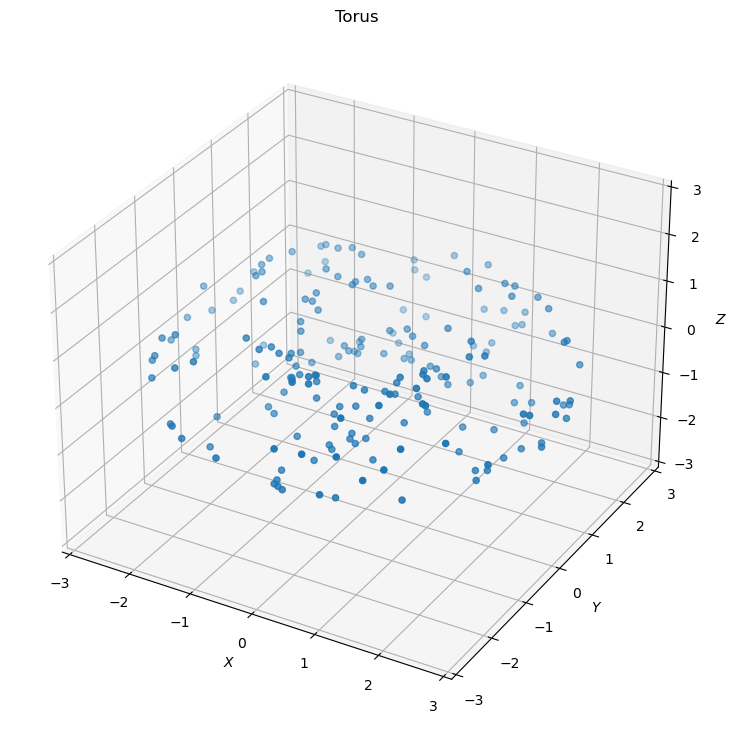

In [15]:
fig = plt.figure(figsize=(9,9))

#===============
# First subplot
# Sample 1: x,z view
#===============
ax = fig.add_subplot( projection='3d')
ax.scatter3D(xs=T[:,0], ys=T[:,1], zs=T[:,2])
# ax.plot3D(xs=x_ols1, ys=x_ols1, zs=y_ols1[:,0], c = 'orange')
# ax.view_init(0, 90)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# ax.set_zlim(-5,5)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.set_title("Torus")
fig.savefig('images/plot_torus_200pts.png')
plt.show()



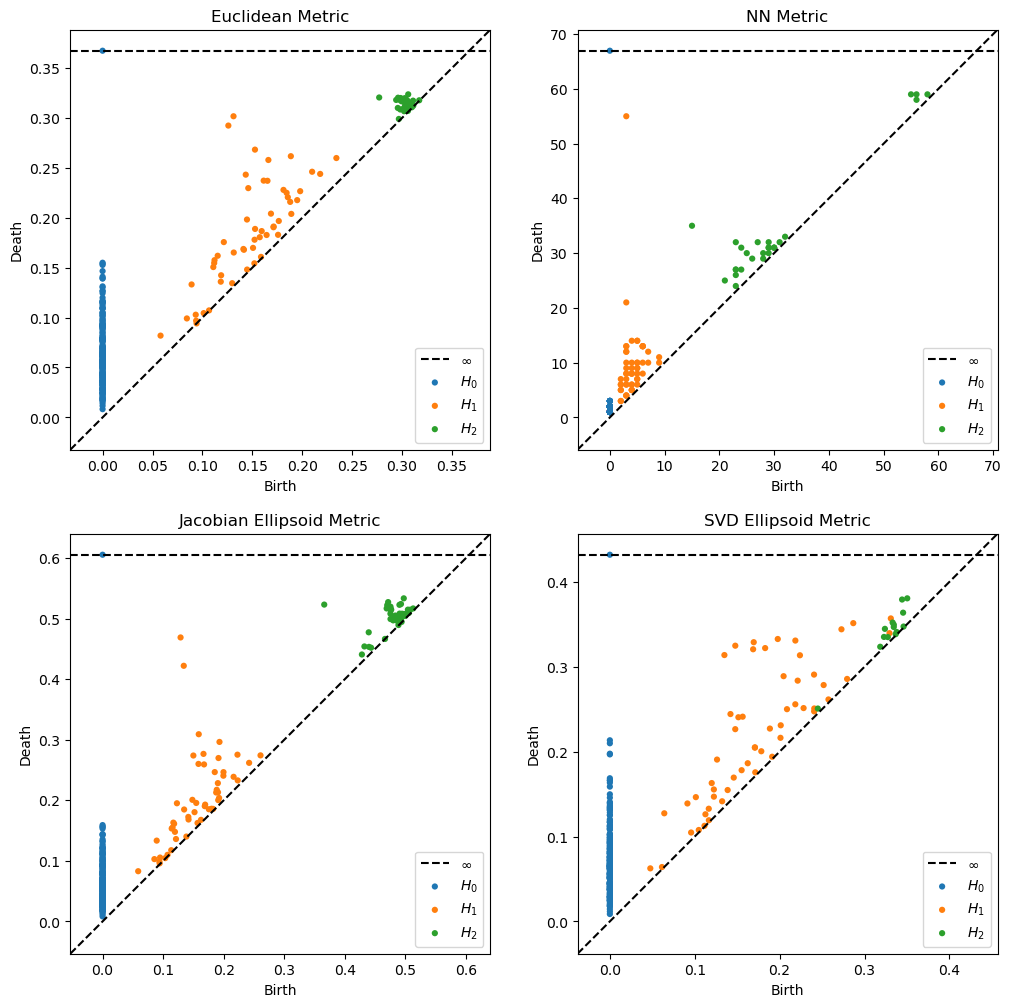

In [16]:
fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True,coeff = 2,maxdim=2)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True,coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True,coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')
fig.savefig('images/diagrams_torus_200pts.png')

In [17]:
# # plotting diagrams calculated over prime fields other than the default Z/2Z


# fig, ax = plt.subplots(figsize=(12,12))
# dgms_ED = ripser(ED, distance_matrix=True, coeff = 2, maxdim=2)['dgms']
# plot_diagrams(dgms_ED,ax=plt.subplot(221), title='Euclidean Metric Z/2Z')

# dgms_ED = ripser(ED, distance_matrix=True, coeff = 3, maxdim=2)['dgms']
# plot_diagrams(dgms_ED,ax=plt.subplot(222), title='Euclidean Metric Z/3Z')

# dgms_ED = ripser(ED, distance_matrix=True, coeff = 5, maxdim=2)['dgms']
# plot_diagrams(dgms_ED,ax=plt.subplot(223), title='Euclidean Metric Z/5Z')

# dgms_ED = ripser(ED, distance_matrix=True, coeff = 7, maxdim=2)['dgms']
# plot_diagrams(dgms_ED,ax=plt.subplot(224), title='Euclidean Metric Z/7Z')

## Torus: 500 points

In [18]:

seed=5
R=2
r=1
np.random.seed(seed)
T = tadasets.torus(n=500, c = R, a = r, noise = 0.0)

sigma = 0.1
x = sym.Symbol('x')
y = sym.Symbol('y')
z = sym.Symbol('z')

f = ((x**2+y**2)**(0.5) - R)**2 + z**2 - r**2

variables = [x,y,z]

times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = ellipsoid_distances.euclidean_distance_matrix(T, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(T, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(T, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = ellipsoid_distances.neighbors_distances(T)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])


0:00:00.507911
0:00:02.432713
0:00:02.443885
0:00:00.096676


In [19]:
# %matplotlib

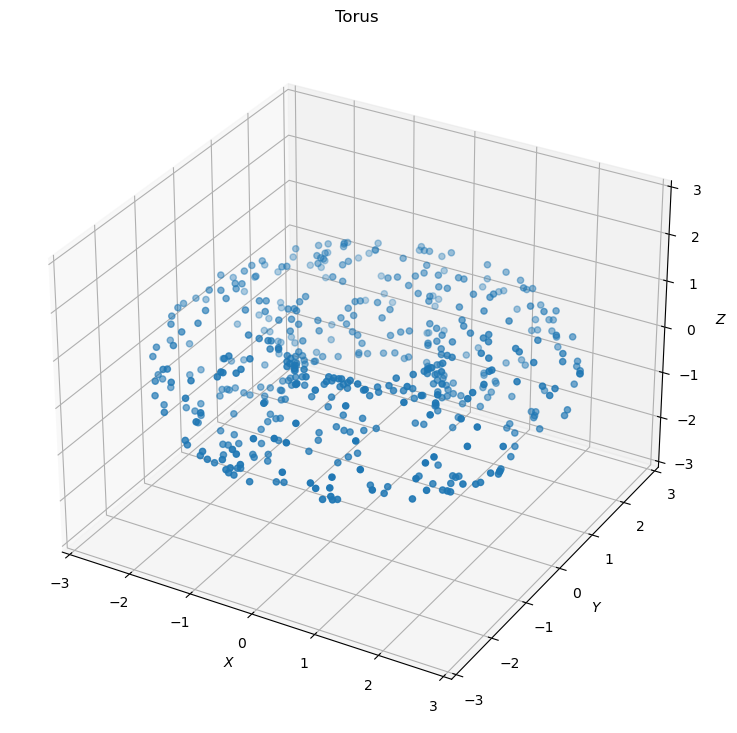

In [20]:
fig = plt.figure(figsize=(9,9))

#===============
# First subplot
# Sample 1: x,z view
#===============
ax = fig.add_subplot( projection='3d')
ax.scatter3D(xs=T[:,0], ys=T[:,1], zs=T[:,2])
# ax.plot3D(xs=x_ols1, ys=x_ols1, zs=y_ols1[:,0], c = 'orange')
# ax.view_init(0, 90)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
# ax.set_xlim(-5,5)
# ax.set_ylim(-5,5)
# ax.set_zlim(-5,5)

ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.set_title("Torus")
fig.savefig('images/plot_torus_500pts.png')
plt.show()

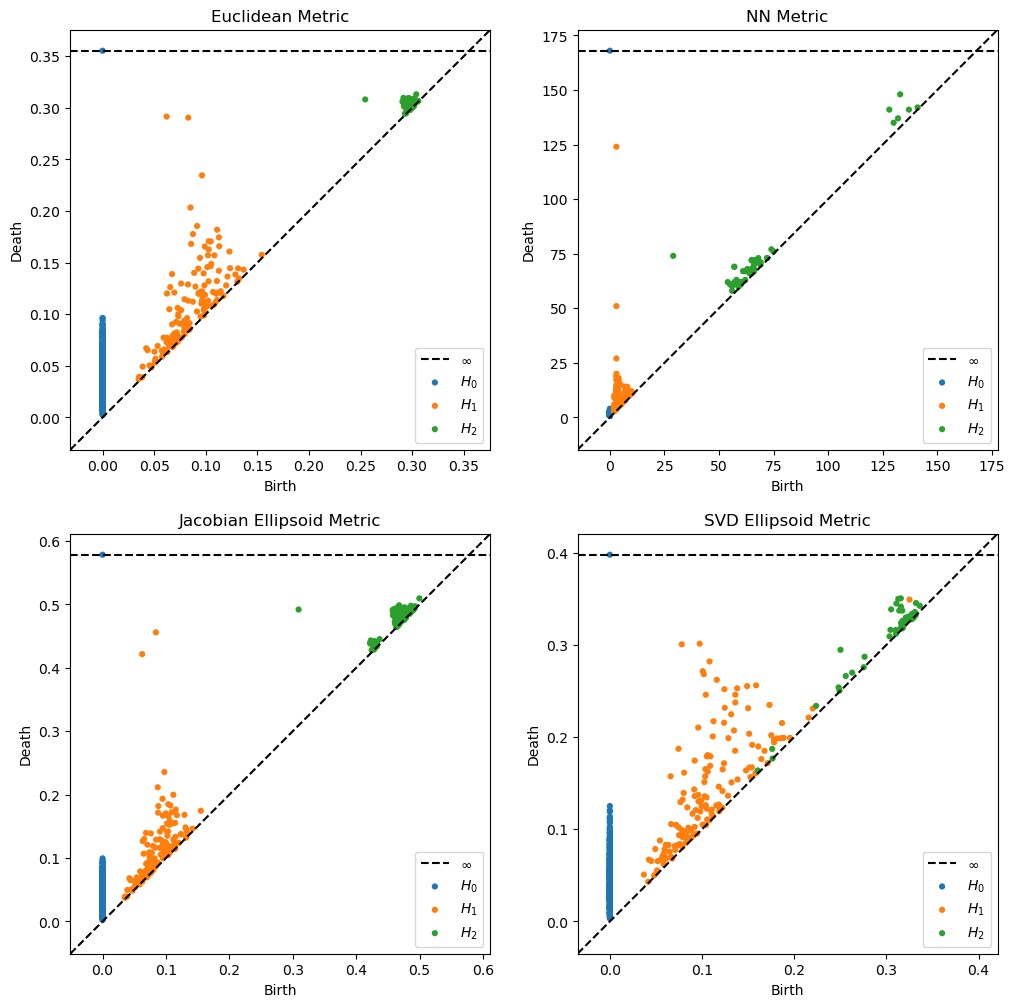

In [21]:
fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True, coeff = 2,maxdim=2)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True, coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True, coeff = 2, maxdim=2)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')
fig.savefig('images/diagrams_torus_500pts.png')

## Diagrams for points sampled on a Torus with noise $= 0.1$

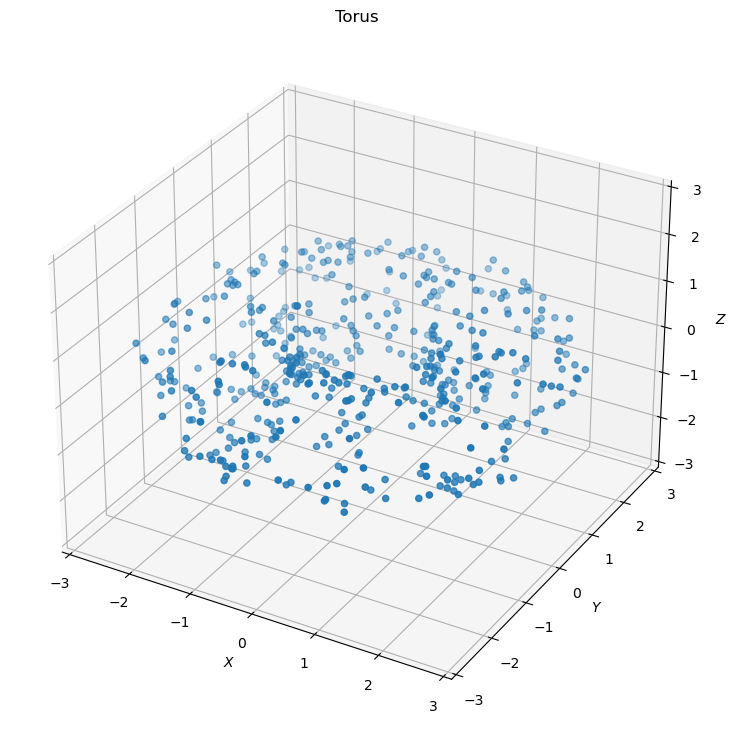

In [22]:
seed=5
np.random.seed(seed)
sigma = 0.1


R=2
r=1
T = tadasets.torus(n=500, c = R, a = r, noise = 0.1)


fig = plt.figure(figsize=(9,9))

#===============
# First subplot
# Sample 1: x,z view
#===============
ax = fig.add_subplot( projection='3d')
ax.scatter3D(xs=T[:,0], ys=T[:,1], zs=T[:,2])
# ax.plot3D(xs=x_ols1, ys=x_ols1, zs=y_ols1[:,0], c = 'orange')
# ax.view_init(0, 90)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.set_title("Torus")
fig.savefig('images/plot_torus_500pts_noise.png')
plt.show()

0:00:00.477495
0:00:02.419922
0:00:02.425297
0:00:00.097330


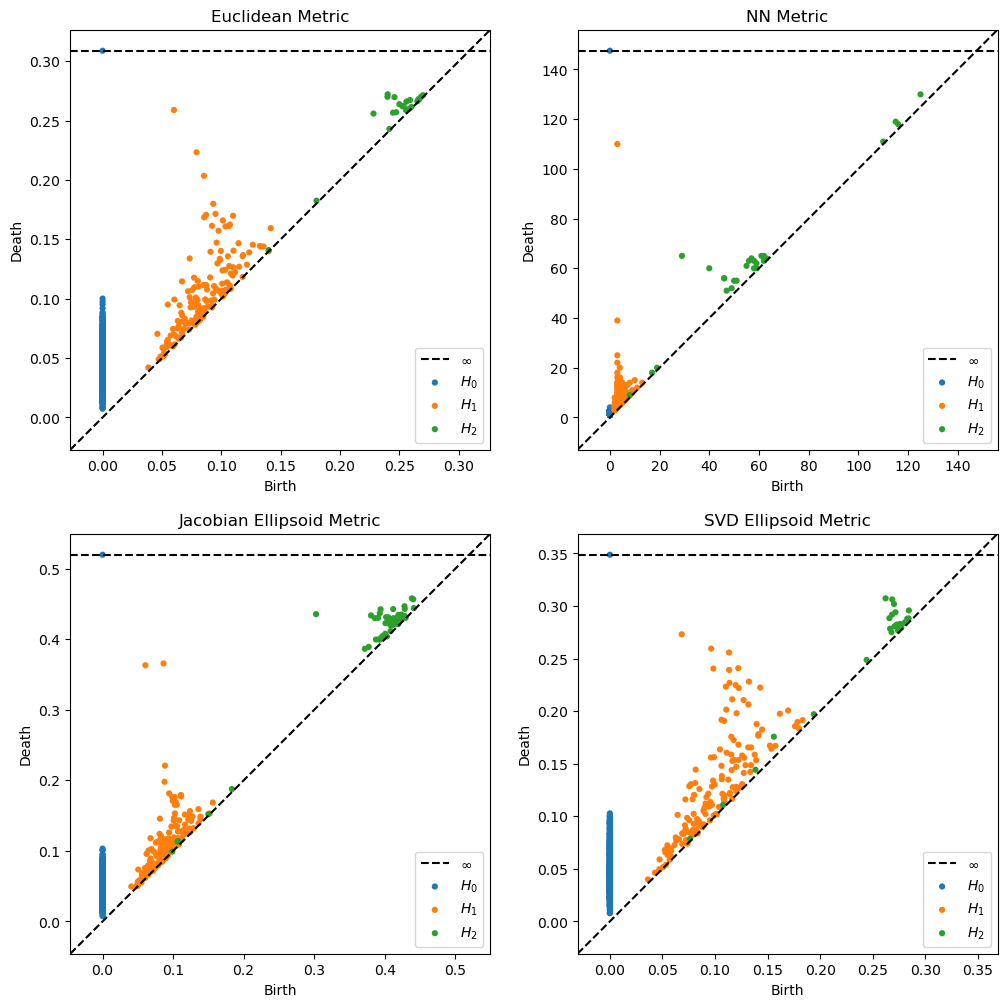

In [23]:
times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = ellipsoid_distances.euclidean_distance_matrix(T, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(T, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(T, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = ellipsoid_distances.neighbors_distances(T)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])




fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')
fig.savefig('images/diagrams_torus_500pts_noise.png')

## Diagrams for points sampled on a Torus with noise $= 0.1$

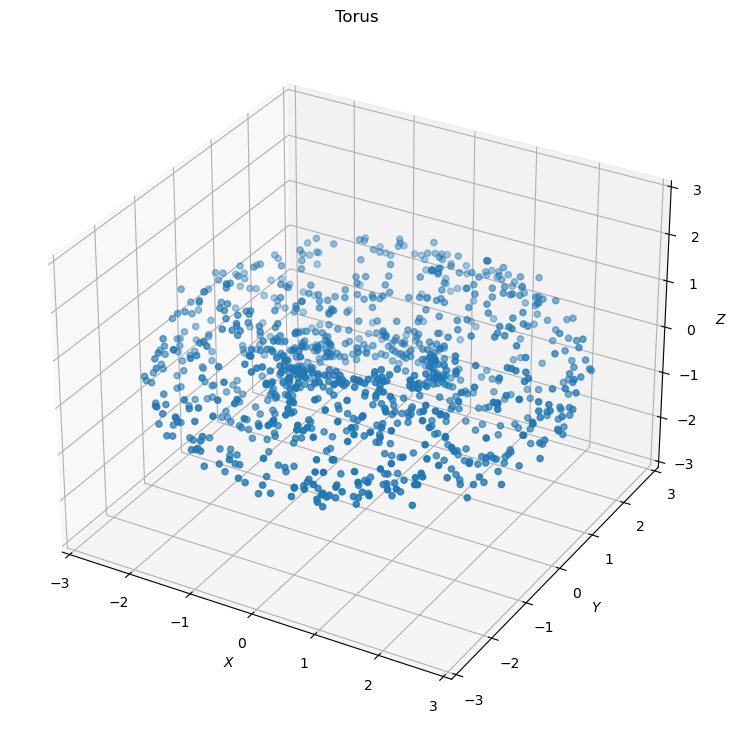

In [24]:
seed=5
np.random.seed(seed)
sigma = 0.1


R=2
r=1
T = tadasets.torus(n=1000, c = R, a = r, noise = 0.1)


fig = plt.figure(figsize=(9,9))

#===============
# First subplot
# Sample 1: x,z view
#===============
ax = fig.add_subplot( projection='3d')
ax.scatter3D(xs=T[:,0], ys=T[:,1], zs=T[:,2])
# ax.plot3D(xs=x_ols1, ys=x_ols1, zs=y_ols1[:,0], c = 'orange')
# ax.view_init(0, 90)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$Z$')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.set_zlim(-3,3)

ax.set_title("Torus")
fig.savefig('images/plot_torus_1000pts_noise.png')
plt.show()

0:00:01.908968
0:00:09.682429
0:00:09.695069
0:00:00.410084


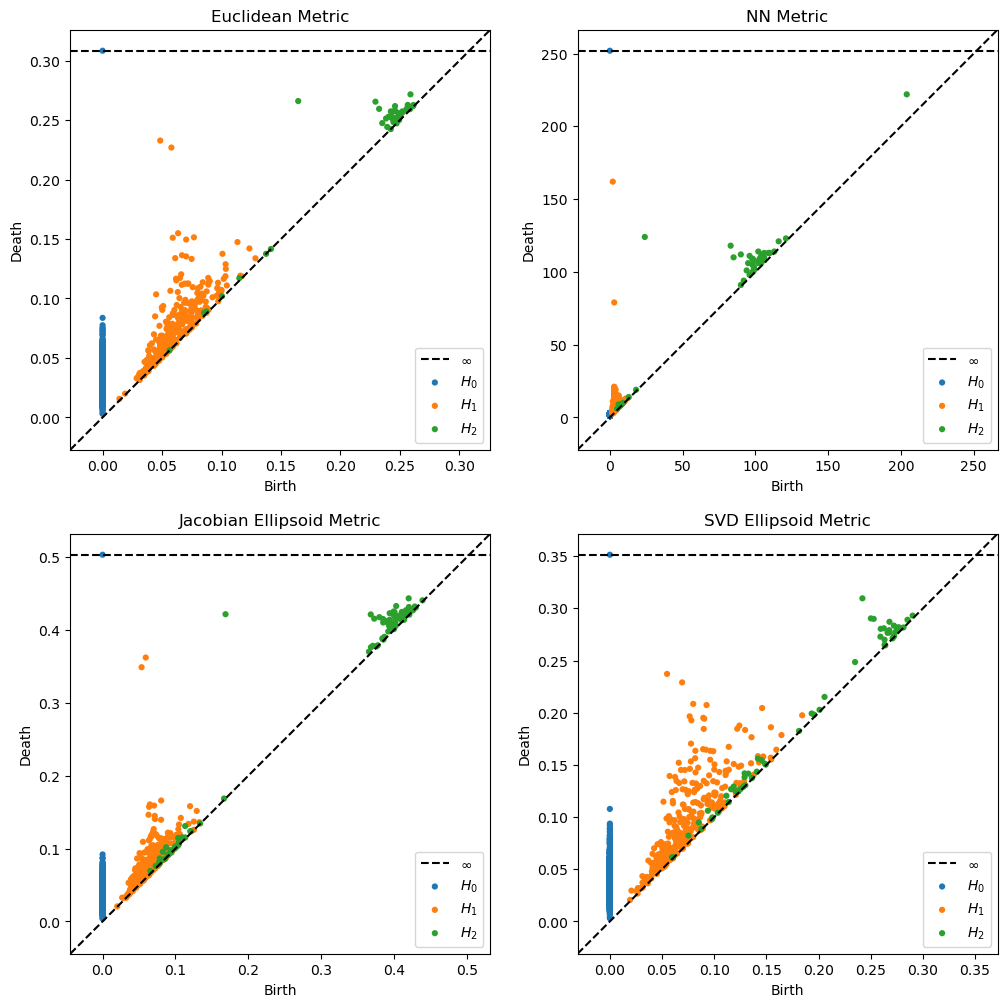

In [25]:
times = []
times.append({'dists':'initial', 'time':datetime.datetime.now()})
ED = ellipsoid_distances.euclidean_distance_matrix(T, normalize = True)
times.append({'dists':'ED', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

JD = ellipsoid_distances.jacobian_ellipsoid_distances(T, f, variables, sigma=0.1)
times.append({'dists':'JD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

SD = ellipsoid_distances.svd_ellipsoid_distances(T, sigma=0.1)
times.append({'dists':'SD', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])

ND = ellipsoid_distances.neighbors_distances(T)
times.append({'dists':'ND', 'time':datetime.datetime.now()})
print(times[-1]['time'] - times[-2]['time'])




fig, ax = plt.subplots(figsize=(12,12))
dgms_ED = ripser(ED, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_ED, ax=plt.subplot(221), title='Euclidean Metric')

dgms_ND = ripser(ND, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_ND, ax=plt.subplot(222), title='NN Metric')

dgms_JD = ripser(JD, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_JD, ax=plt.subplot(223), title='Jacobian Ellipsoid Metric')

dgms_SD = ripser(SD, distance_matrix=True, maxdim=2)['dgms']
plot_diagrams(dgms_SD, ax=plt.subplot(224), title='SVD Ellipsoid Metric')

In [26]:
fig.savefig('images/diagrams_torus_1000pts_noise.png')